***Why do we need imputation in the first place?***

Missing value imputation is an important topic in data science. It is a basic method for solving incomplete dataset problems where one or more than one data point is missing. Three types of missingness mechanisms can cause an incomplete dataset. They are missing completely at random (MCAR), missing at random (MAR), and not missing at random (NMAR).

Generally, suppose 10–15% of data points are missing from a dataset. Those data points can be removed from the analysis (although this percentage depends on specific domains) without significantly affecting the results. When it exceeds 15%, one needs to be cautious before removing the data points as it might dramatically affect the conclusion. Interested readers are encouraged to read this review article on missing value imputation.

Imputation is the process of replacing missing data with 1 or more specific values, to allow statistical analysis that includes all participants, not just those with no missing data.

Missing value imputation is a process in which some statistical or machine learning techniques are implemented to replace these missing data points with substituted values. Statistical methods, such as mean/mode and regression, have been widely used for imputation. Besides, machine learning techniques, such as the k nearest neighbour, artificial neural network, and support vector machine techniques have been employed in several analyses in recent years. There are specific techniques for different domains. For example, here is a review article on missing value imputation techniques in bioinformatics(https://link.springer.com/article/10.1007/s10462-019-09709-4).

Some popular or widely used methods are: linear regression (LR), least squares (LS), and mean/mode. The mean and mode methods are the simplest imputation methods for imputing numerical and categorical attribute values. Among, ML techniques the most widely method is kNN imputation.

Original Data with Missing Values:
   Feature_0  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5   
0   1.268034  -1.938790  -2.657481   0.450603        NaN   0.750109  \
1  -1.659509   1.799067  -0.321888   0.283751   1.472452   0.771765   
2   0.588233  -0.135523   2.659634   0.034027   0.660927  -0.259529   
3   0.930852   2.858530   3.244368  -0.889241   0.702170  -0.660185   
4  -0.752371   2.277090   2.454236  -0.116229   1.958278   1.670844   

   Feature_6  Feature_7  Feature_8  Feature_9  Target  
0  -1.319657  -1.869816   2.045422   0.839415       1  
1   0.104738        NaN   0.454337  -0.575068       0  
2   1.920629        NaN  -0.864698  -3.041237       1  
3   1.067658   0.955301   0.364498  -0.403121       0  
4   0.637865   0.214713  -1.401239  -2.124745       0  


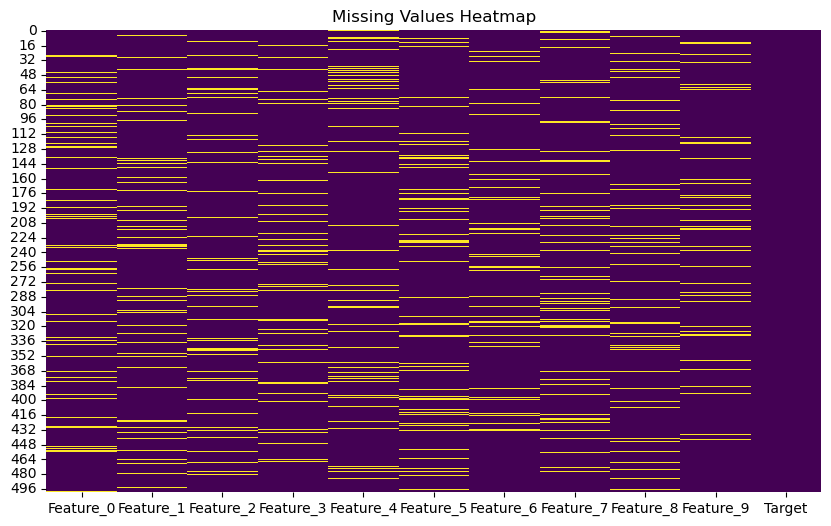


--- Using mean imputation method ---


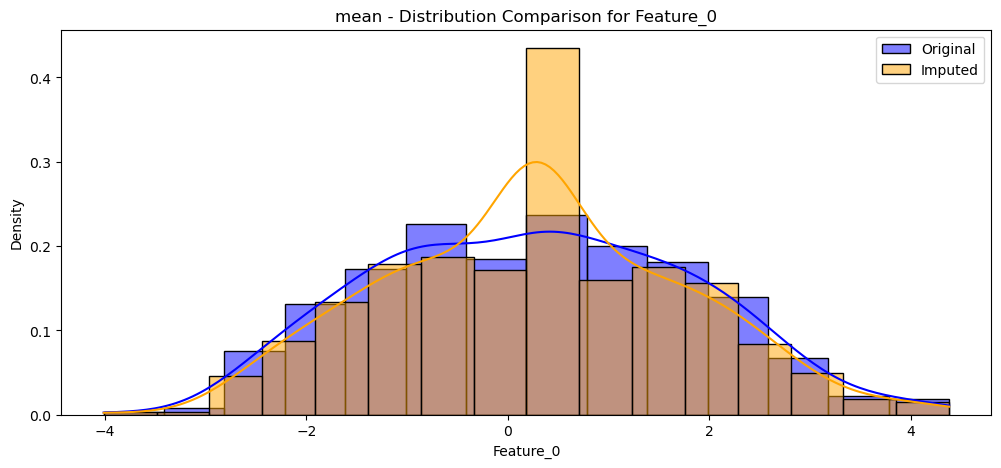

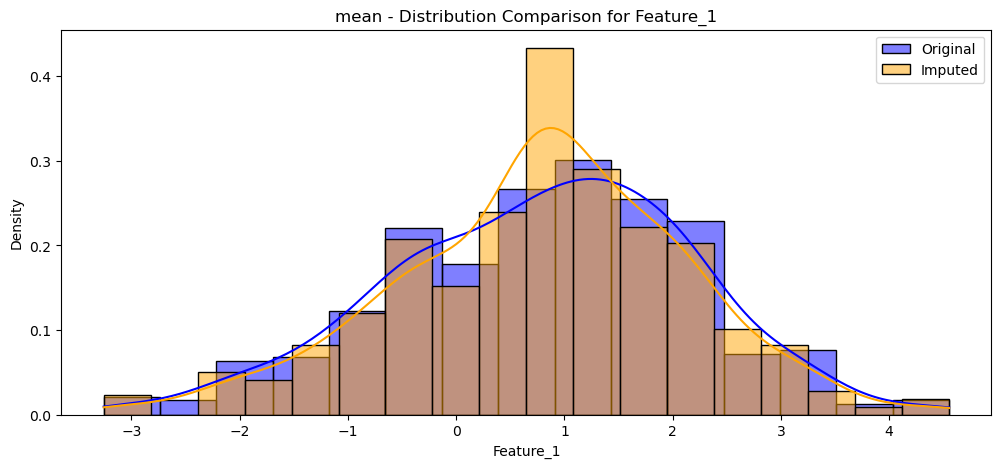

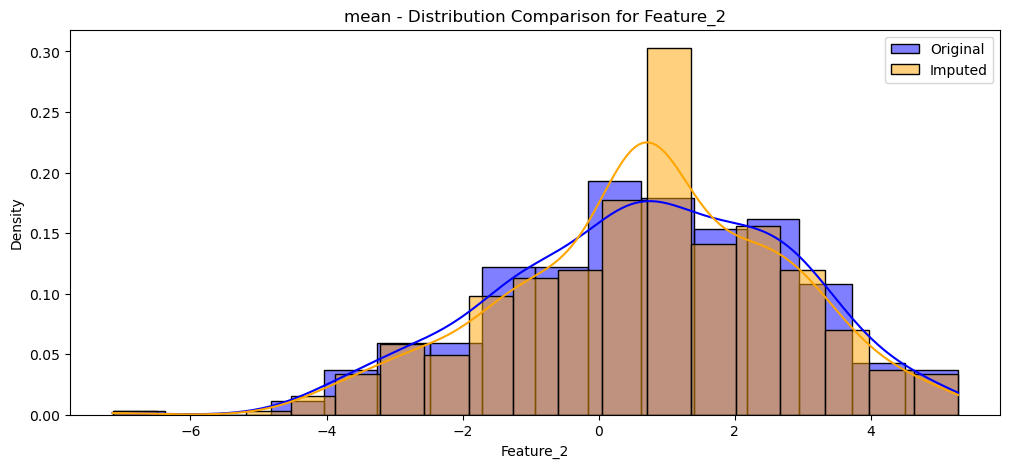

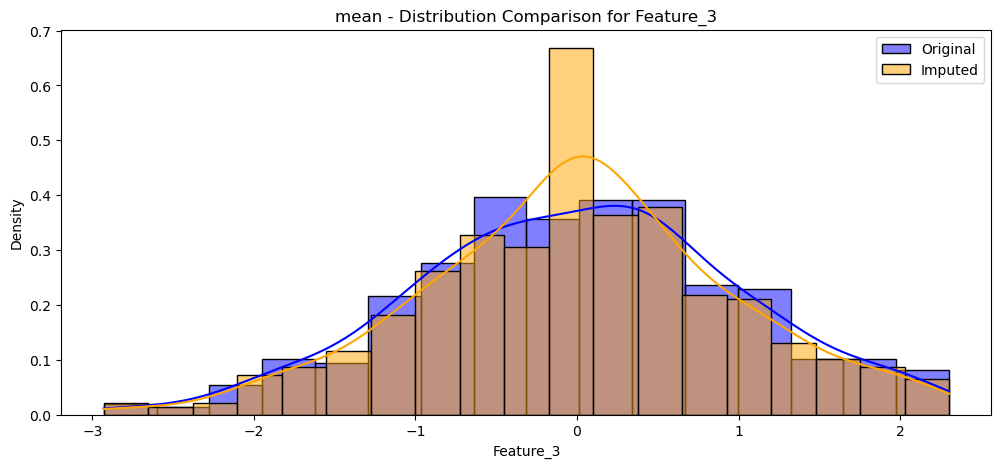

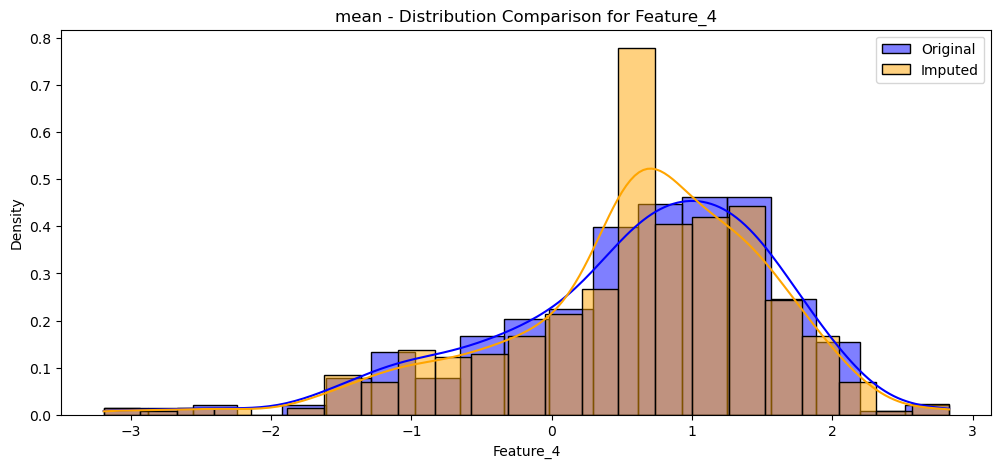

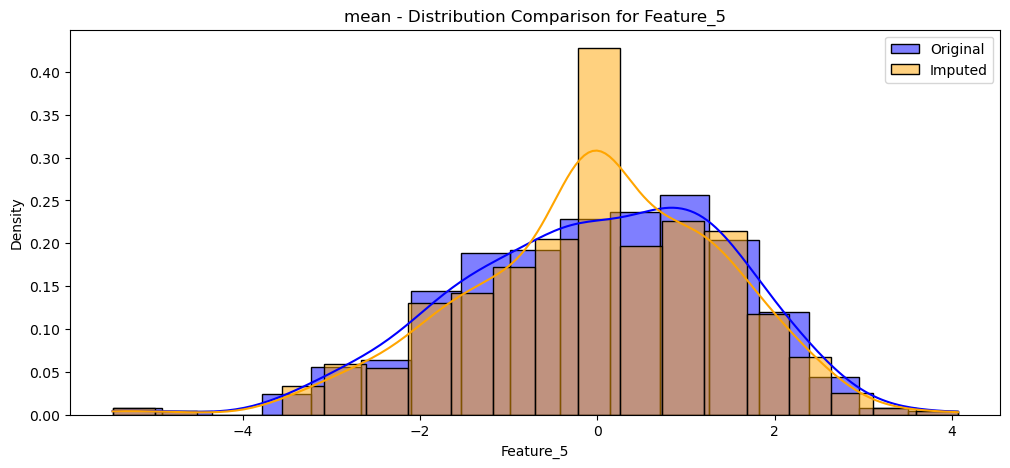

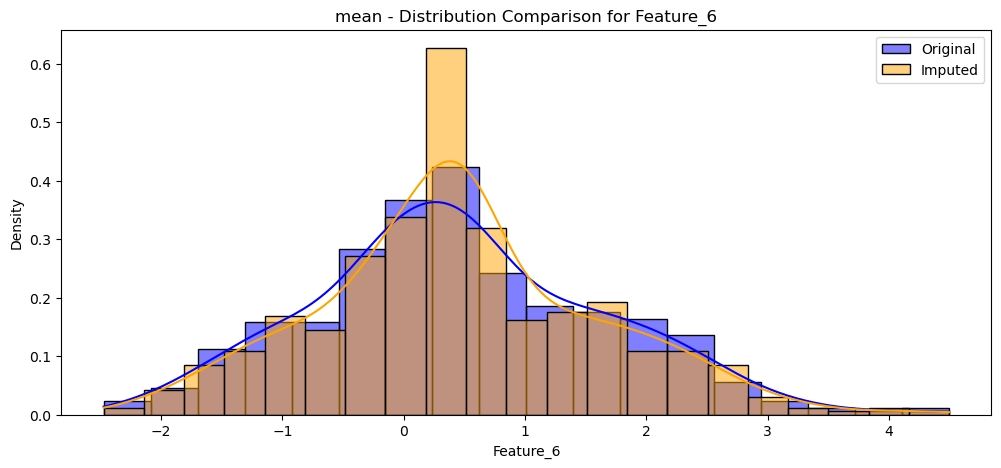

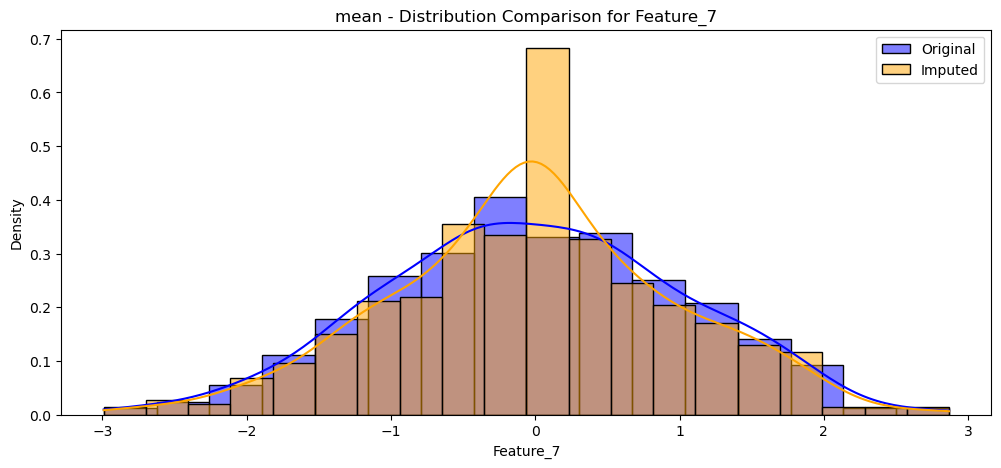

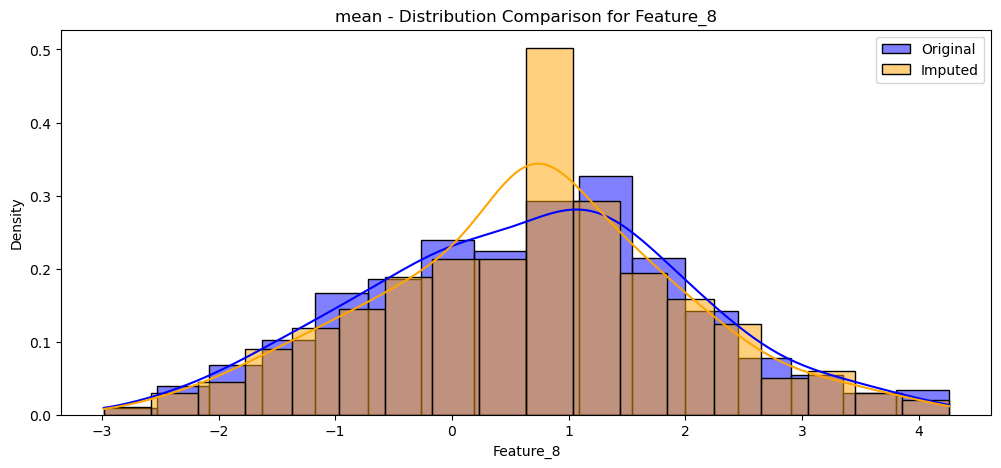

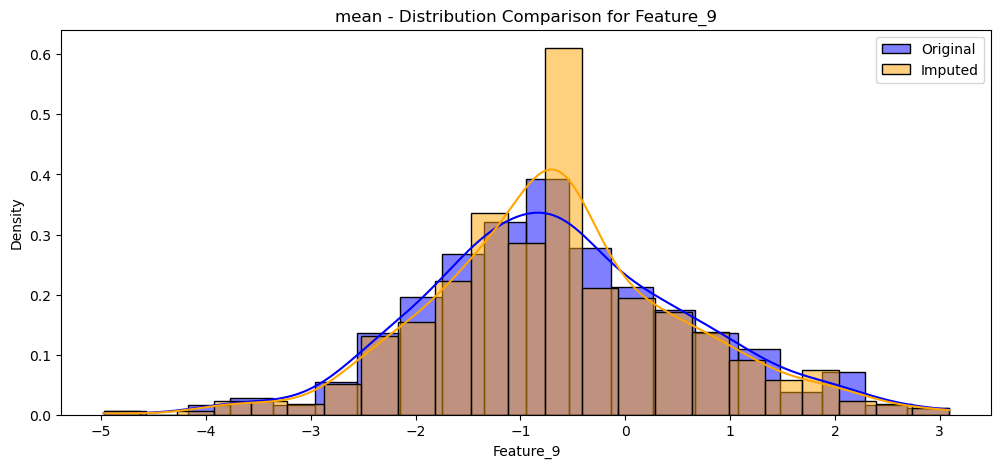


--- Using median imputation method ---


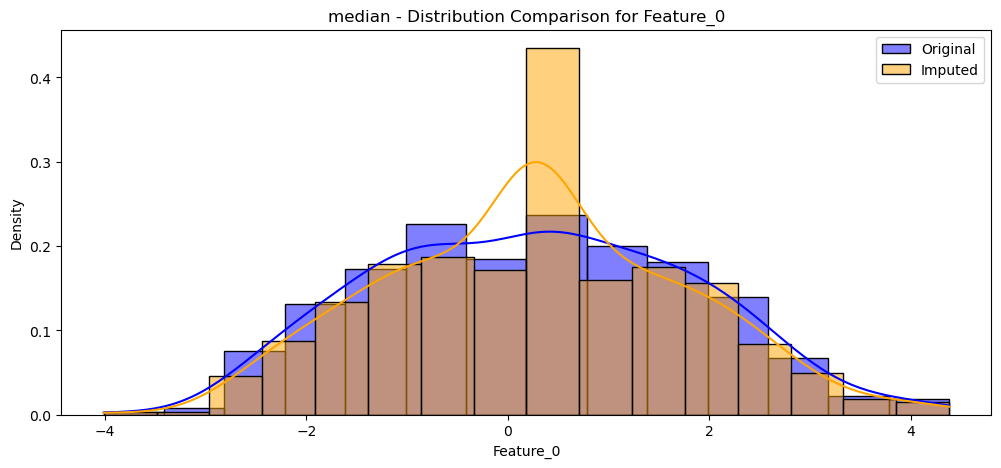

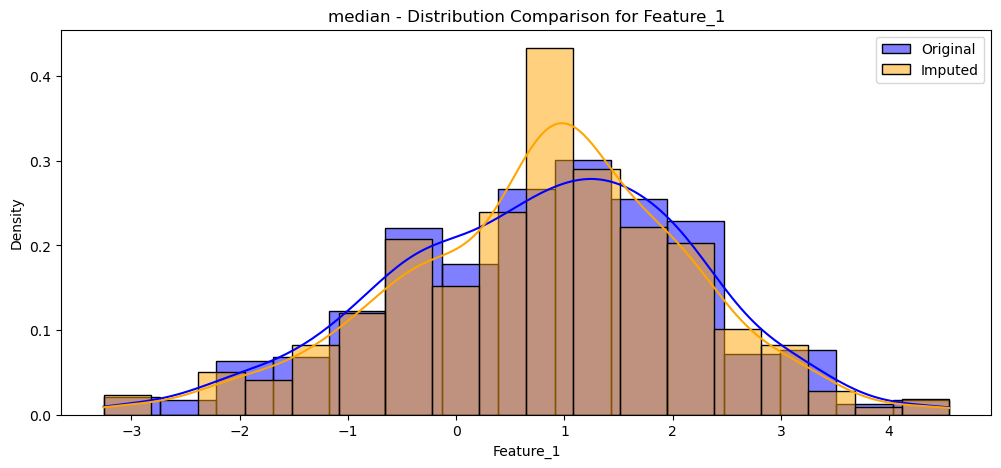

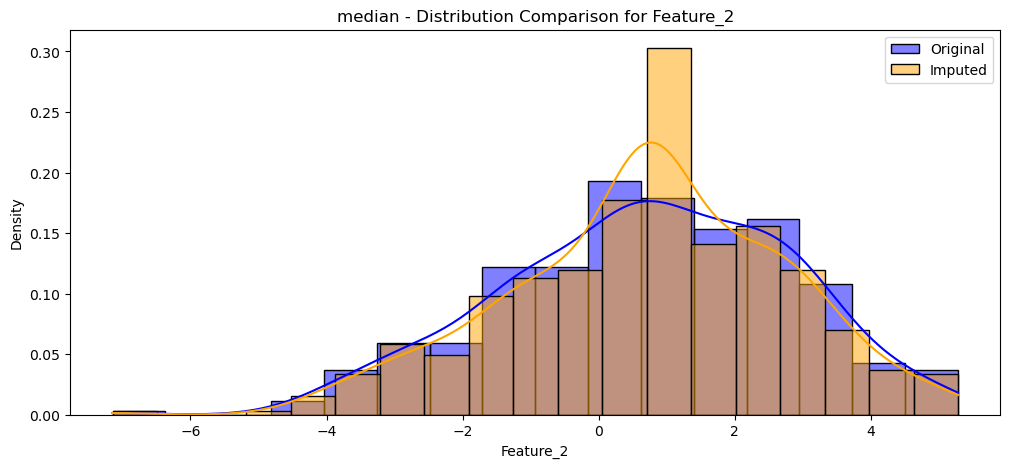

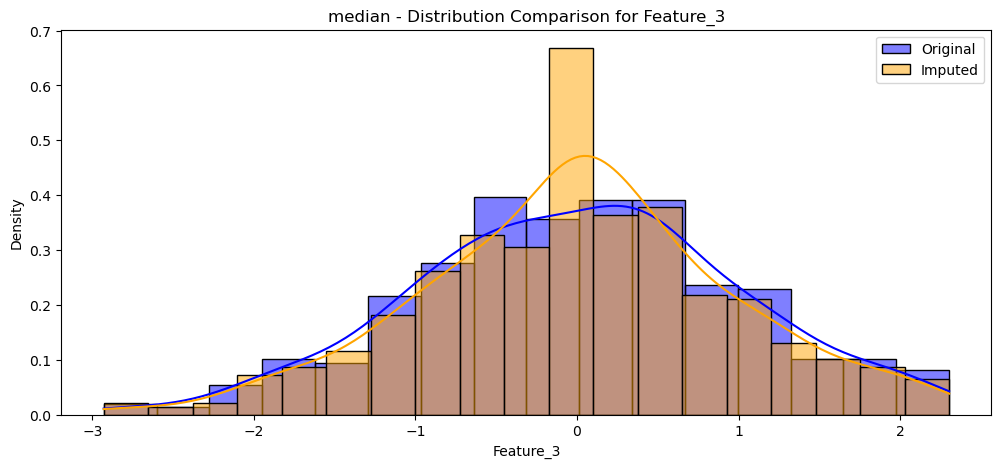

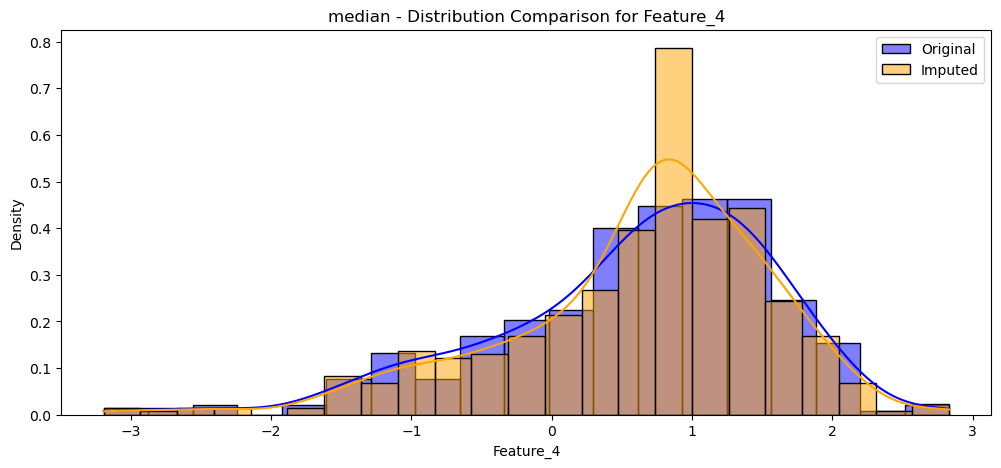

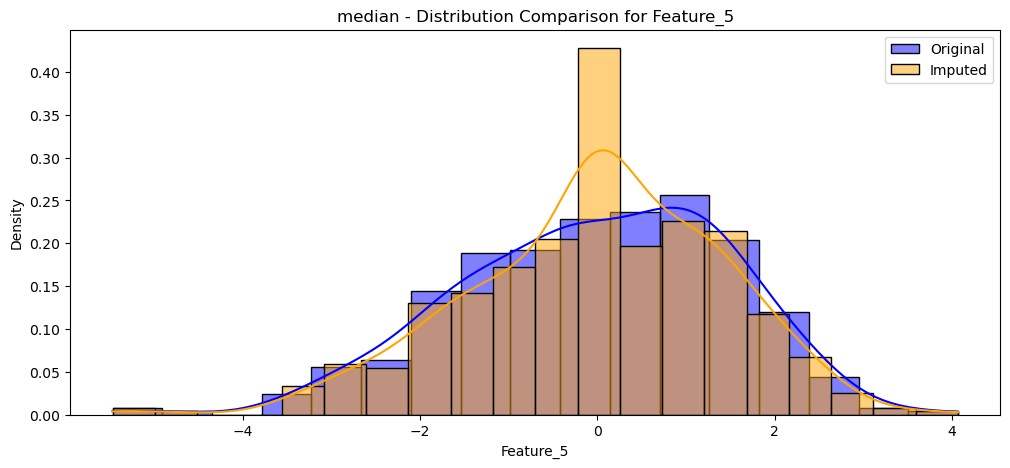

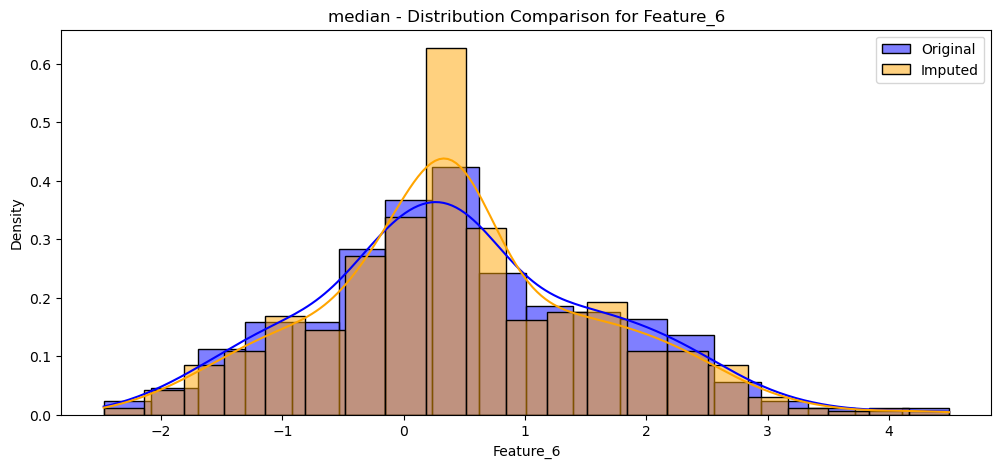

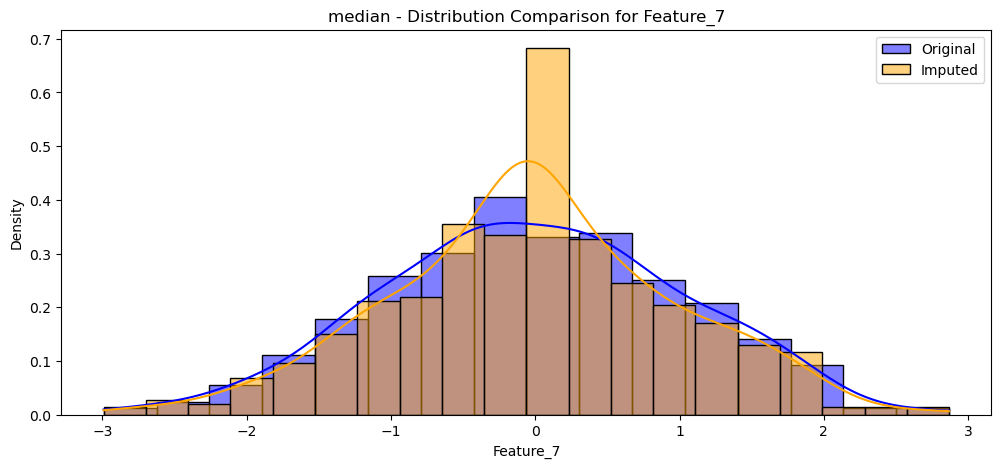

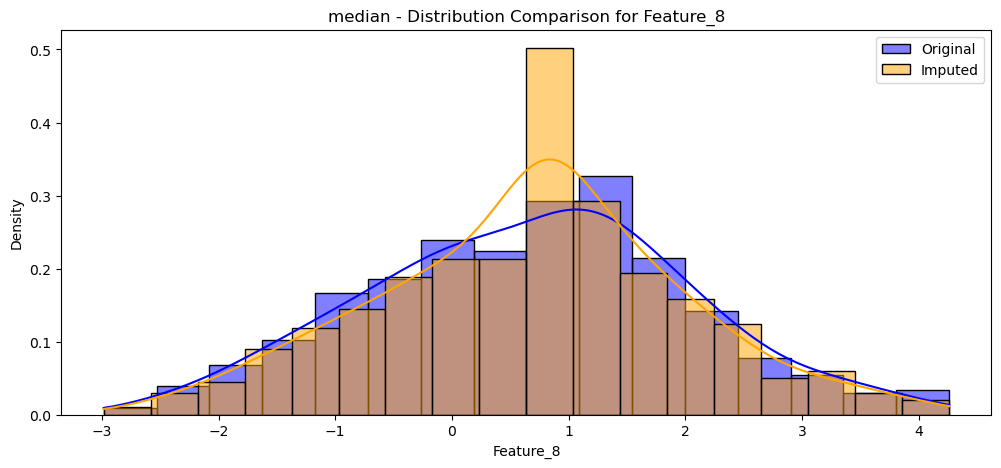

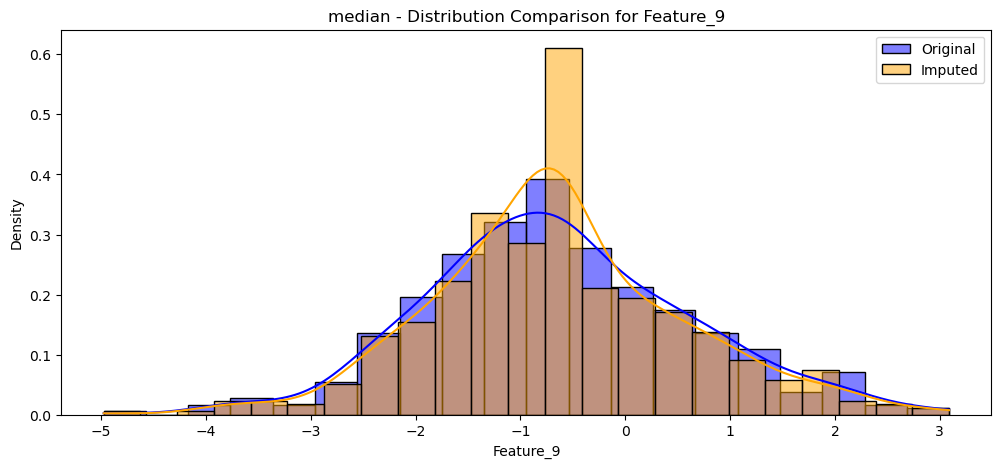


--- Using knn imputation method ---


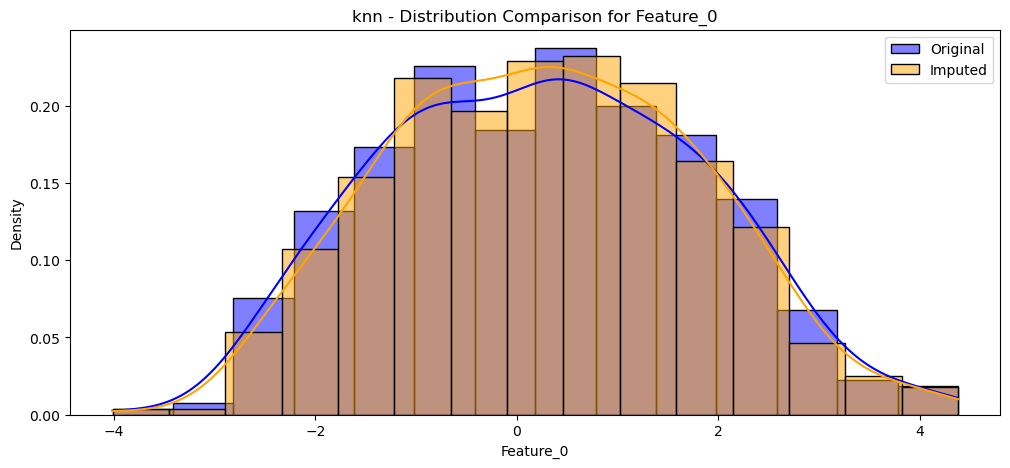

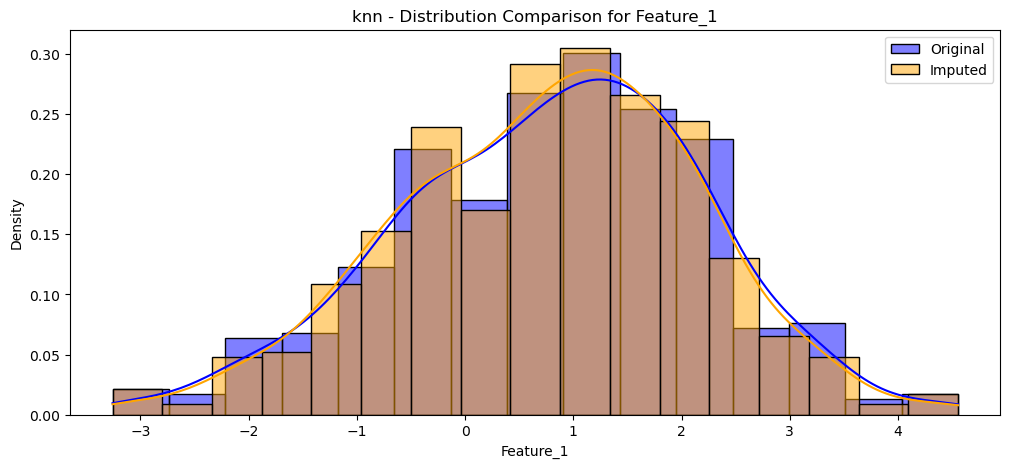

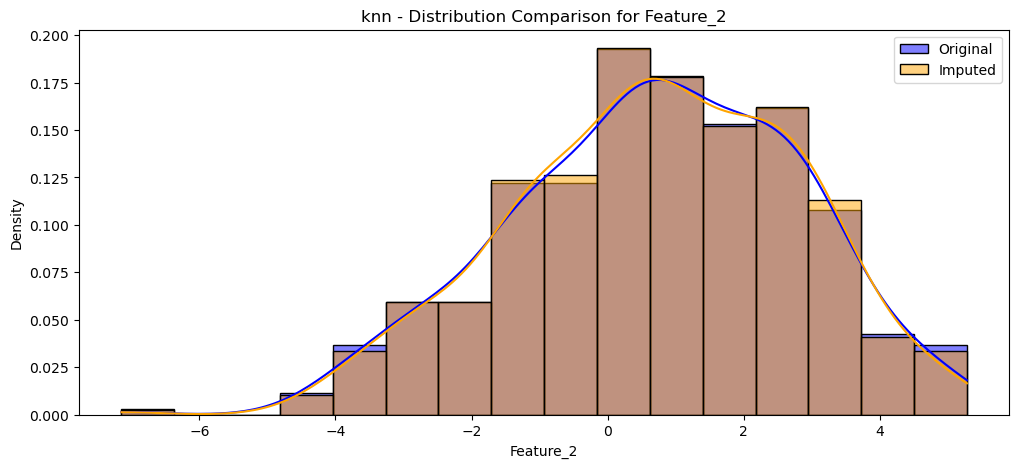

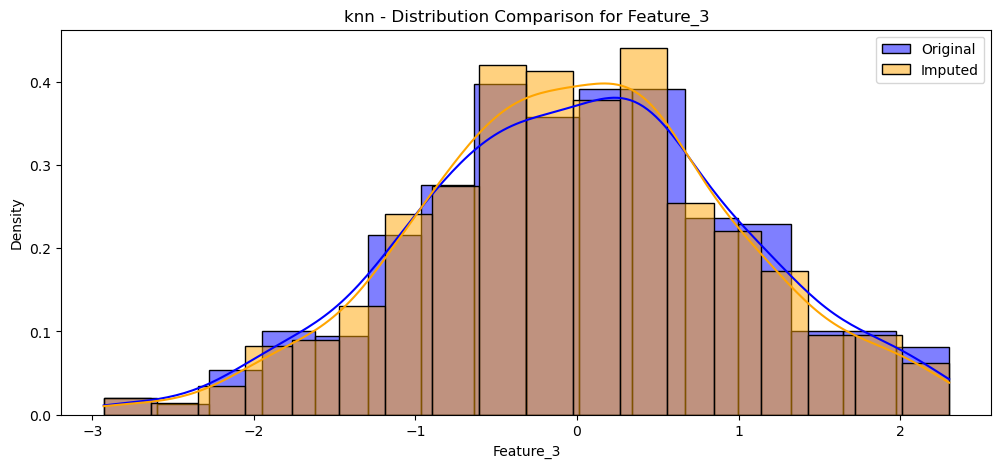

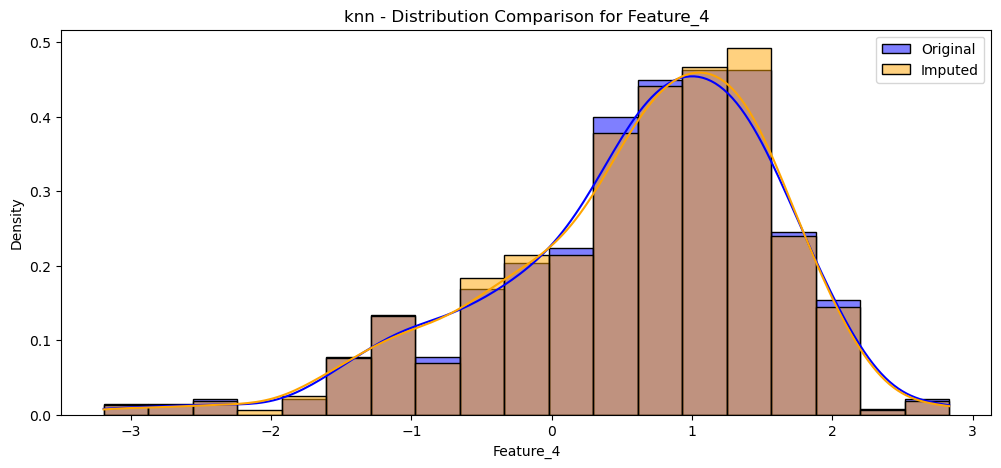

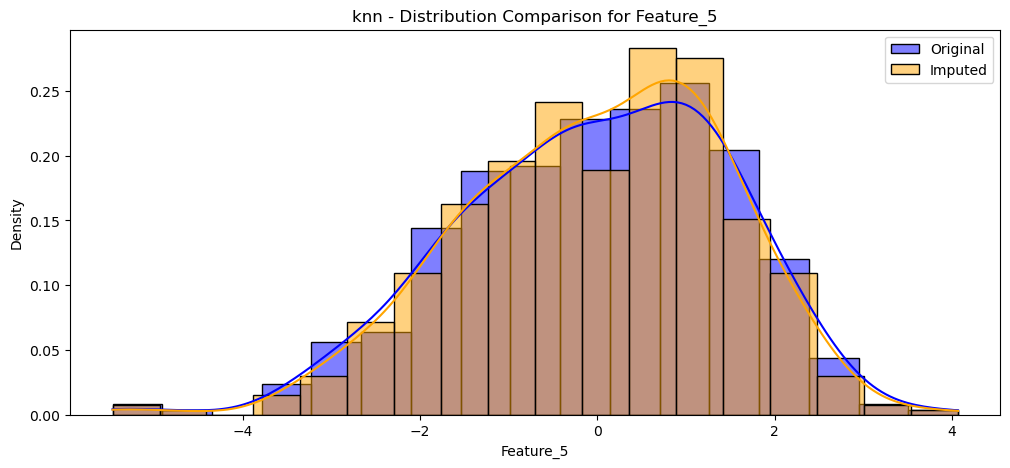

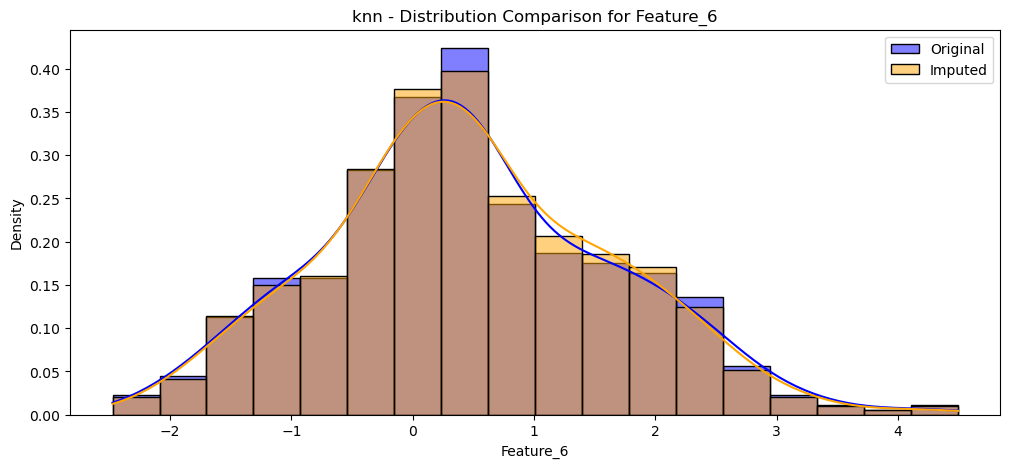

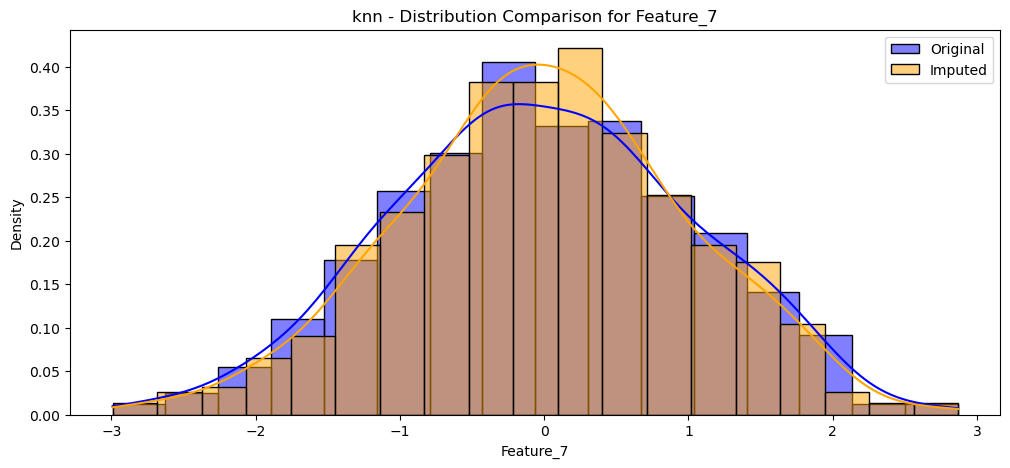

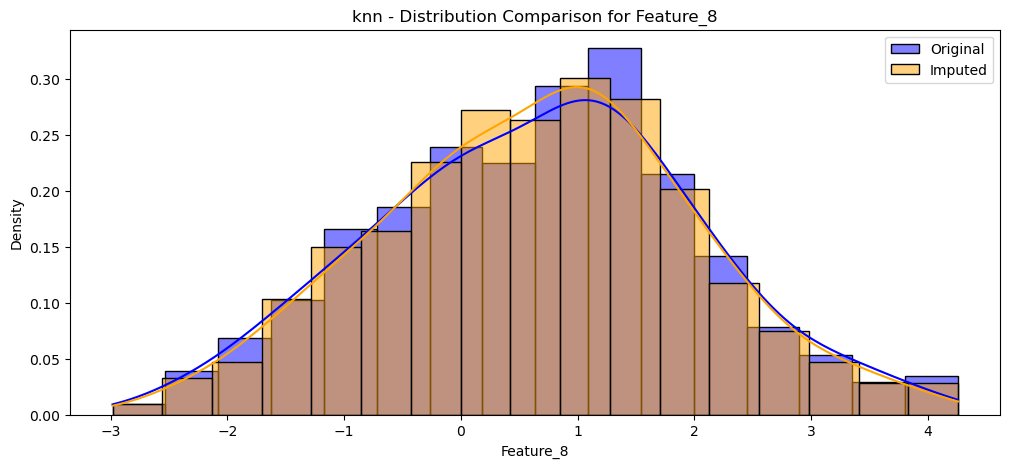

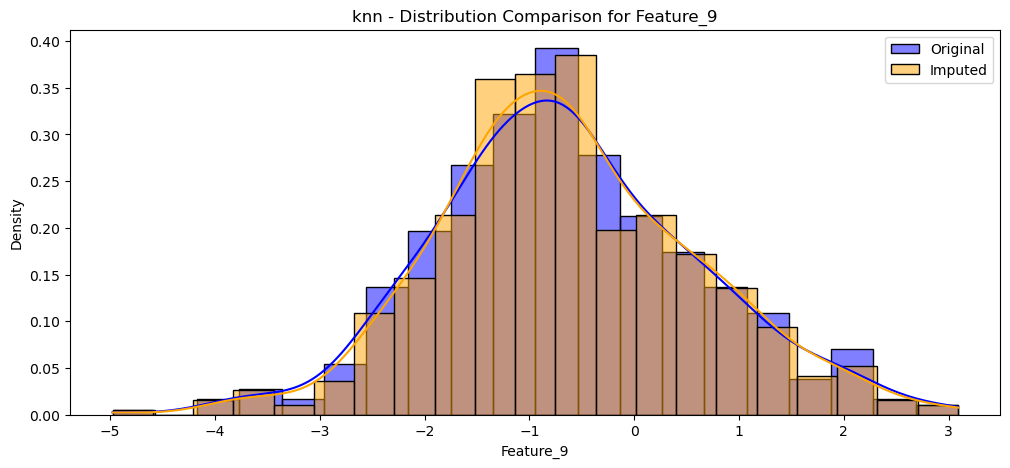


--- Using iterative imputation method ---


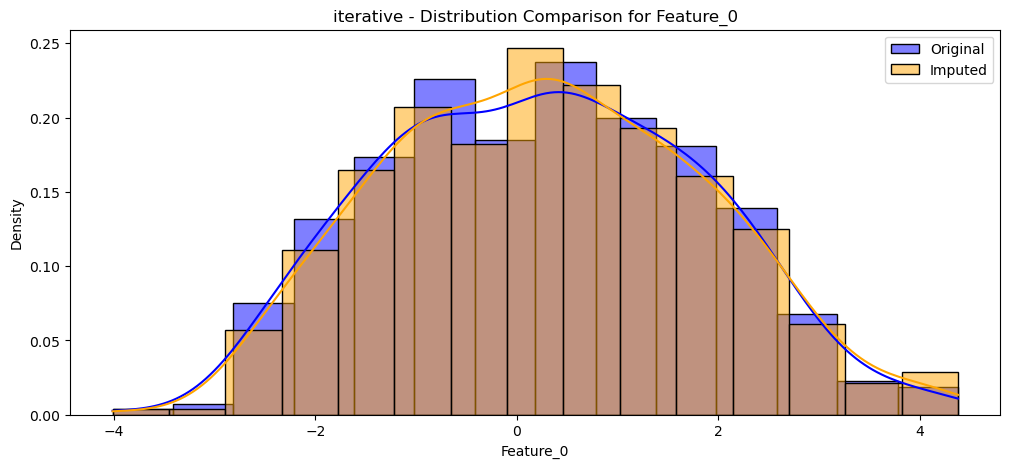

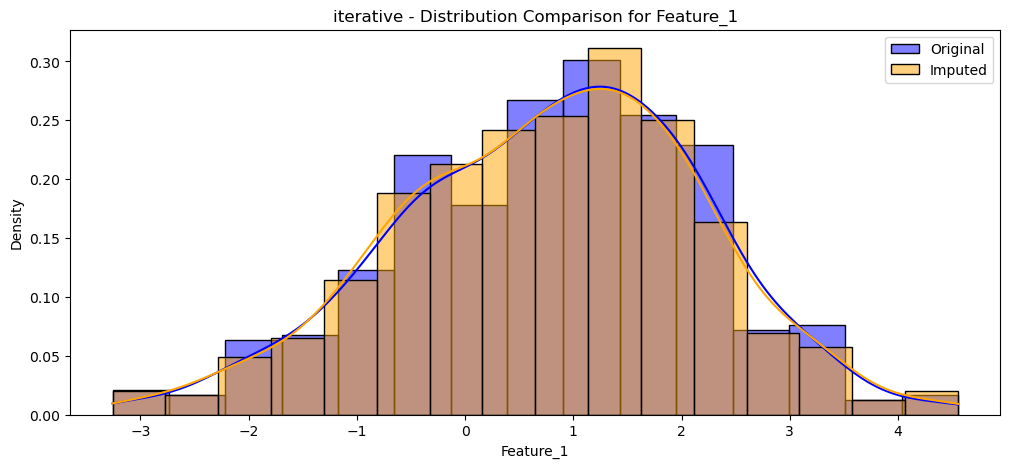

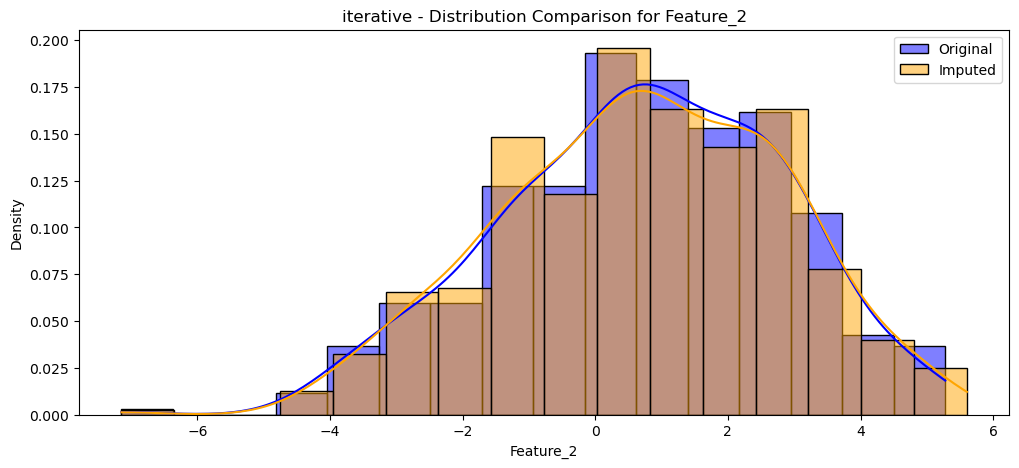

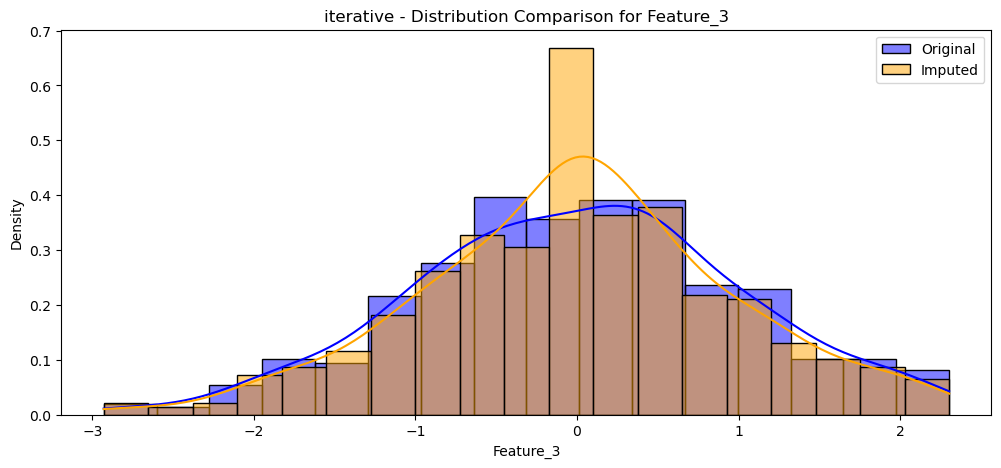

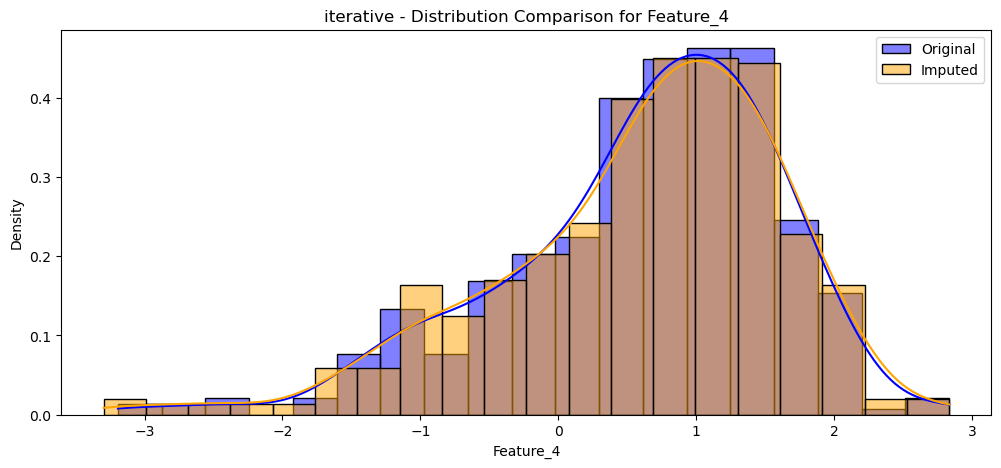

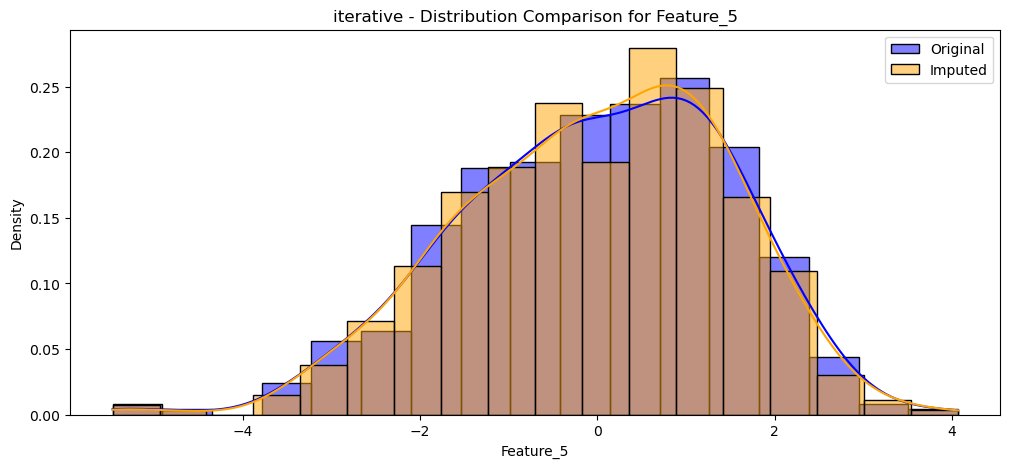

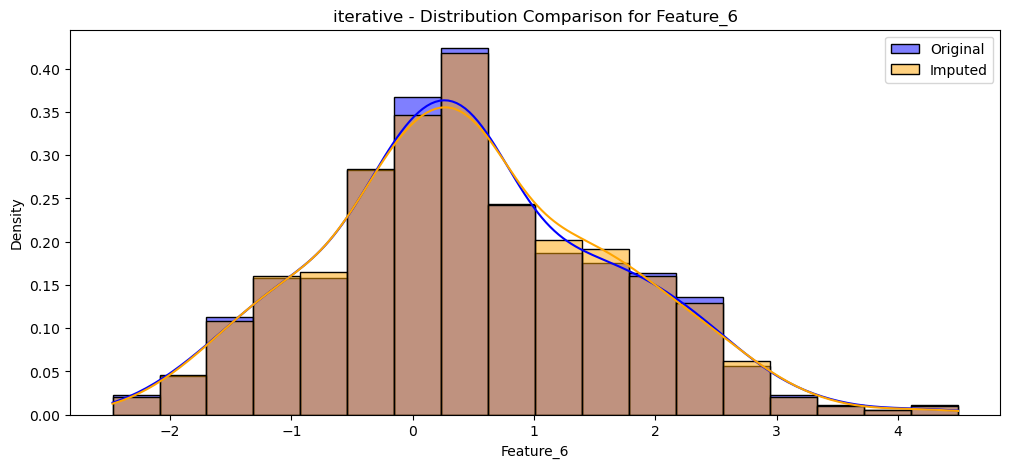

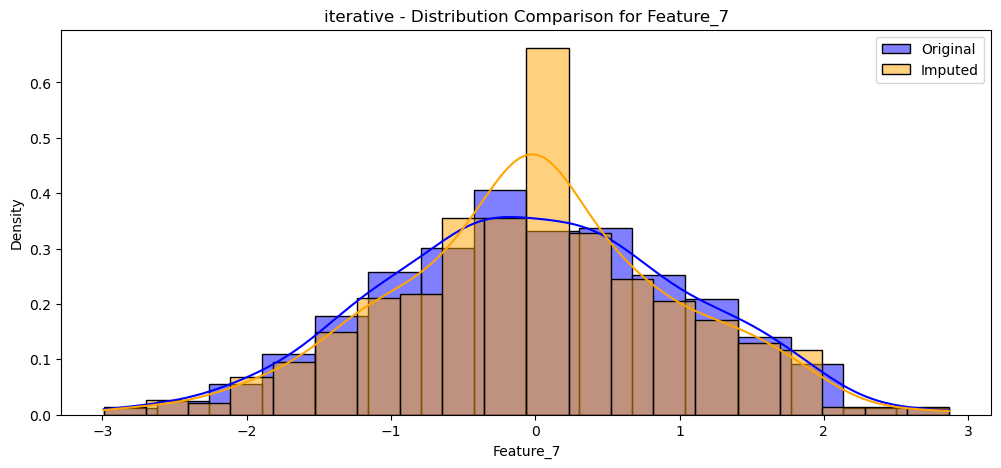

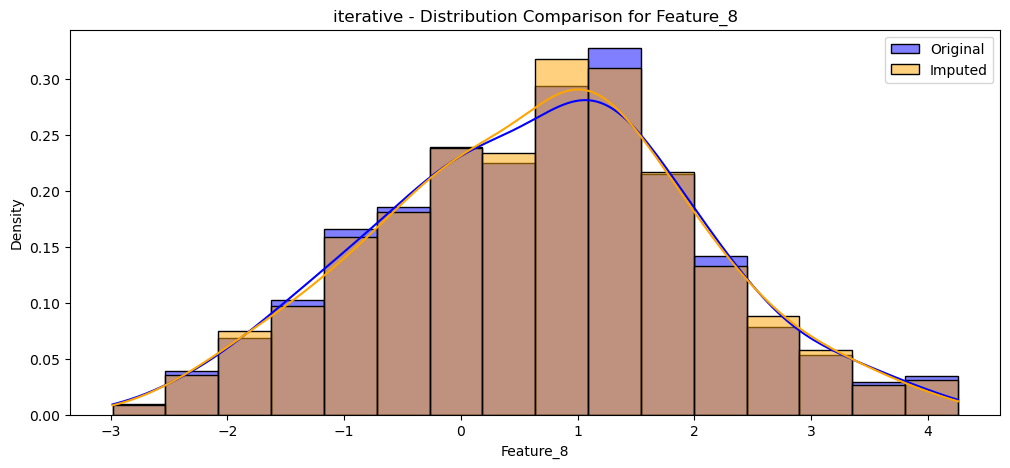

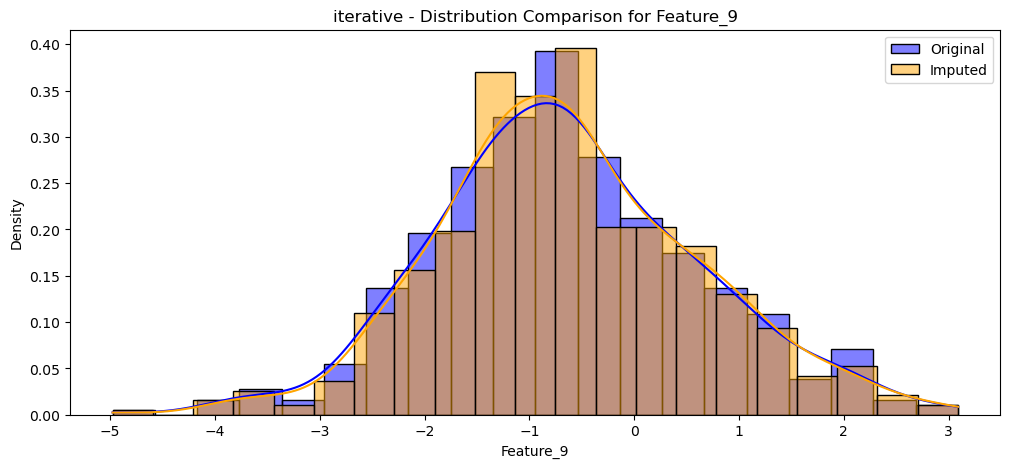

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Generate synthetic data with missing values
def create_data():
    X, y = make_classification(
        n_samples=500,
        n_features=10,
        n_informative=5,
        n_redundant=3,
        n_classes=2,
        weights=[0.7, 0.3],
        random_state=42
    )

    # Introduce missing values randomly
    rng = np.random.default_rng(42)
    missing_mask = rng.random(X.shape) < 0.1
    X[missing_mask] = np.nan

    data = pd.DataFrame(X, columns=[f"Feature_{i}" for i in range(X.shape[1])])
    data['Target'] = y
    return data

# Visualize missing values
def visualize_missing(data):
    plt.figure(figsize=(10, 6))
    sns.heatmap(data.isnull(), cbar=False, cmap="viridis")
    plt.title("Missing Values Heatmap")
    plt.show()

# Generic imputation function
def impute_data(data, method='mean'):
    X = data.drop(columns=['Target'])
    y = data['Target']

    if method == 'mean':
        imputer = SimpleImputer(strategy='mean')
    elif method == 'median':
        imputer = SimpleImputer(strategy='median')
    elif method == 'knn':
        imputer = KNNImputer(n_neighbors=5)
    elif method == 'iterative':
        imputer = IterativeImputer(random_state=42)
    else:
        raise ValueError("Unsupported imputation method")

    X_imputed = imputer.fit_transform(X)
    return pd.DataFrame(X_imputed, columns=X.columns), y

# Visualize original and imputed data
def visualize_distributions(original, imputed, method_name):
    for col in original.columns:
        plt.figure(figsize=(12, 5))

        sns.histplot(original[col].dropna(), kde=True, label="Original", color='blue', stat='density')
        sns.histplot(imputed[col], kde=True, label="Imputed", color='orange', stat='density')

        plt.title(f"{method_name} - Distribution Comparison for {col}")
        plt.legend()
        plt.savefig(f"{method_name}_{col}_distribution_comparison.png")
        plt.show()

# Main function to execute full imputation project
def main():
    methods = ['mean', 'median', 'knn', 'iterative']
    data = create_data()
    print("Original Data with Missing Values:")
    print(data.head())

    visualize_missing(data)

    for method in methods:
        print(f"\n--- Using {method} imputation method ---")
        imputed_data, target = impute_data(data, method=method)
        visualize_distributions(data.drop(columns=['Target']), imputed_data, method)

if __name__ == "__main__":
    main()


The choice of method should be informed by the pattern of missingness, data type, and downstream modeling goals.

### References

Resources for Further Reading:
- Little, R. J. A., & Rubin, D. B. (2019). *Statistical Analysis with Missing Data*. https://onlinelibrary.wiley.com/doi/book/10.1002/9781119482260#aboutBook-pane
  
- van Buuren, S. (2018). *Flexible Imputation of Missing Data*. https://stefvanbuuren.name/fimd/

  
- Yulei He et al. (2021). *Multiple Imputation of Missing Data in Practice*. https://www.routledge.com/Multiple-Imputation-of-Missing-Data-in-Practice-Basic-Theory-and-Analysis-Strategies/He-Zhang-Hsu/p/book/9781032136899?srsltid=AfmBOorj6QGt4FuhRCHrlex0LRB7ob6DeWEi8LfhP97-NodAlRToRsYn

  
- scikit-learn documentation: https://scikit-learn.org/stable/modules/impute.html

  